In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.metrics import f1_score
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('Datasets/CV0_train_subset_step1_0.csv', index_col=0)
y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"] - 1
X_test = pd.read_csv('Datasets/CV0_test_subset_0.csv', index_col=0)
y_test= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_test.index]["damage_grade"] - 1
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# MLP with few but large layers

In [3]:
spaceMLP  = [Integer(100, 500, name="n_neurons"),
             Integer(2, 5, name="n_layers")]

In [4]:
@use_named_args(spaceMLP)
def objectiveMLP(n_neurons, n_layers):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for i in range(n_layers):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
        model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=80, batch_size=1024, validation_data=(X_test, y_test), verbose=0)
    e = max(history.history['val_accuracy'])
    epoch = history.history['val_accuracy'].index(e)
    plt.plot(range(80),history.history['accuracy'], label="train accuracy")
    plt.plot(range(80),history.history['val_accuracy'], label="validation accuracy")
    plt.legend()
    plt.show()
    print("max score test = "+ str(e) + " at epoch= " + str(epoch) + "; n_neurons = " + str(n_neurons) + "; n_layers = " + str(n_layers))
    return 1 - e

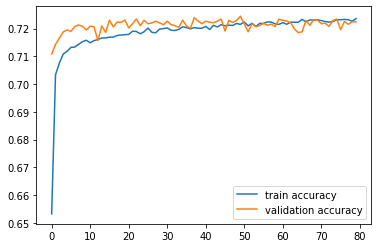

max score test = 0.7244436 at epoch= 49; n_neurons = 337; n_layers = 5


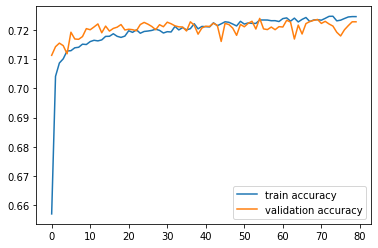

max score test = 0.7240023 at epoch= 54; n_neurons = 443; n_layers = 5


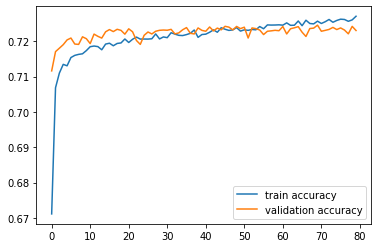

max score test = 0.7245779 at epoch= 69; n_neurons = 349; n_layers = 3


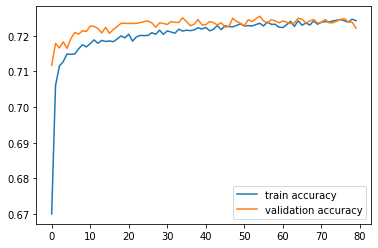

max score test = 0.72546047 at epoch= 54; n_neurons = 219; n_layers = 2


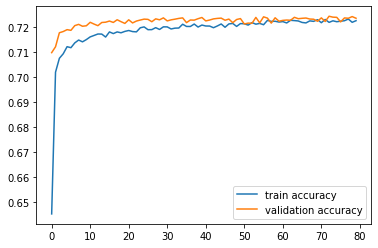

max score test = 0.724175 at epoch= 72; n_neurons = 209; n_layers = 3


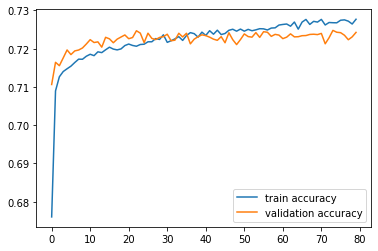

max score test = 0.7247314 at epoch= 73; n_neurons = 425; n_layers = 3


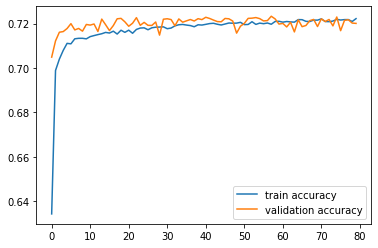

max score test = 0.7232924 at epoch= 57; n_neurons = 257; n_layers = 5


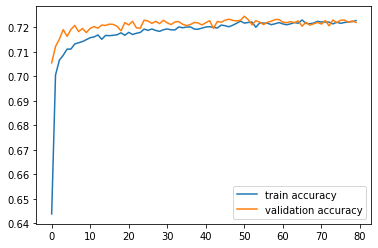

max score test = 0.72450113 at epoch= 50; n_neurons = 235; n_layers = 4


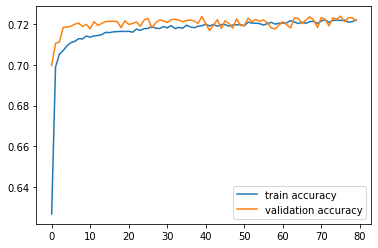

max score test = 0.7238488 at epoch= 75; n_neurons = 247; n_layers = 5


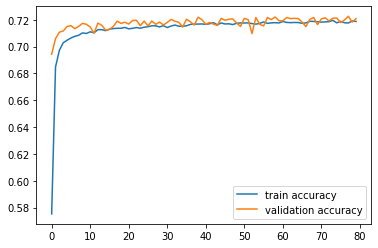

max score test = 0.72264004 at epoch= 77; n_neurons = 156; n_layers = 5


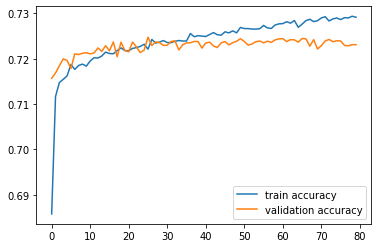

max score test = 0.7247698 at epoch= 25; n_neurons = 500; n_layers = 2


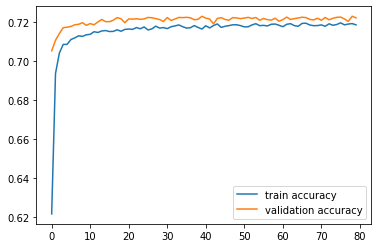

max score test = 0.7227744 at epoch= 78; n_neurons = 100; n_layers = 2


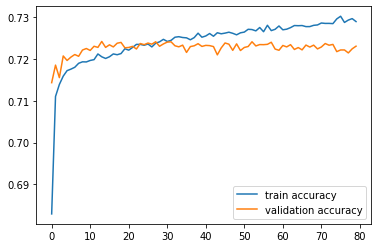

max score test = 0.724175 at epoch= 13; n_neurons = 500; n_layers = 2


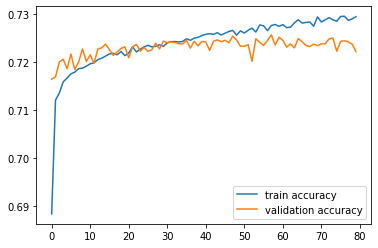

max score test = 0.7256907 at epoch= 57; n_neurons = 500; n_layers = 2


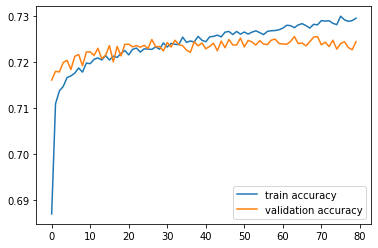

max score test = 0.72563314 at epoch= 63; n_neurons = 500; n_layers = 2


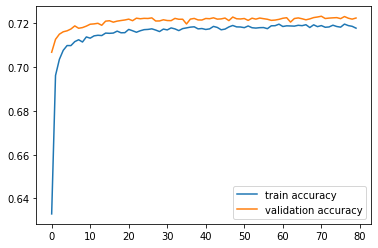

max score test = 0.723254 at epoch= 70; n_neurons = 101; n_layers = 2


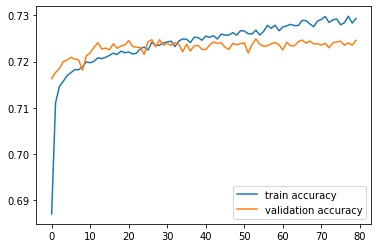

max score test = 0.72492325 at epoch= 53; n_neurons = 500; n_layers = 2


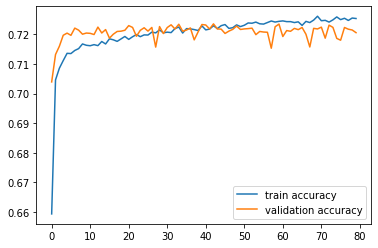

max score test = 0.72354186 at epoch= 42; n_neurons = 500; n_layers = 5


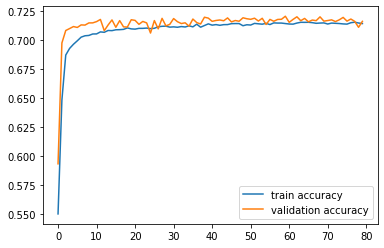

max score test = 0.72066385 at epoch= 59; n_neurons = 100; n_layers = 5


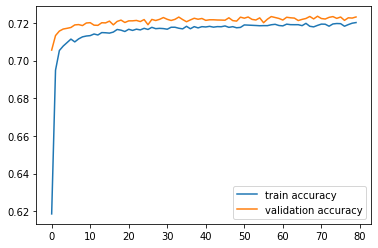

max score test = 0.72352266 at epoch= 69; n_neurons = 100; n_layers = 2


(0.7256907224655151, 500, 2)

In [5]:
res_MLP = gp_minimize(objectiveMLP, spaceMLP, n_calls=20, random_state=0)
1-res_MLP.fun, res_MLP.x[0], res_MLP.x[1]

Those kind of MLP are prone to overfitting very quick. Their results with early stopping are interesting.

In [6]:
spaceMLP  = [Integer(450, 700, name="n_neurons")]

In [7]:
@use_named_args(spaceMLP)
def objectiveMLP(n_neurons):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for i in range(2):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
        model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=35, batch_size=1024, validation_data=(X_test, y_test), verbose=0)
    e = max(history.history['val_accuracy'])
    epoch = history.history['val_accuracy'].index(e)
    plt.plot(range(35),history.history['accuracy'], label="train accuracy")
    plt.plot(range(35),history.history['val_accuracy'], label="validation accuracy")
    plt.legend()
    plt.show()
    print("max score test = "+ str(e) + " at epoch= " + str(epoch) + "; n_neurons = " + str(n_neurons))
    return 1 - e

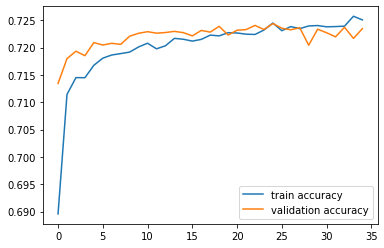

max score test = 0.7244052 at epoch= 24; n_neurons = 598


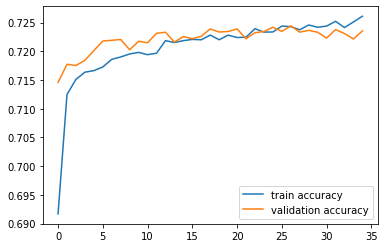

max score test = 0.7244436 at epoch= 26; n_neurons = 661


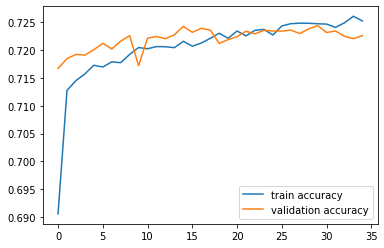

max score test = 0.72436684 at epoch= 29; n_neurons = 664


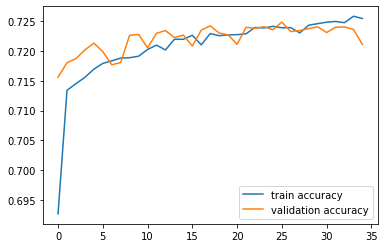

max score test = 0.72482735 at epoch= 25; n_neurons = 662


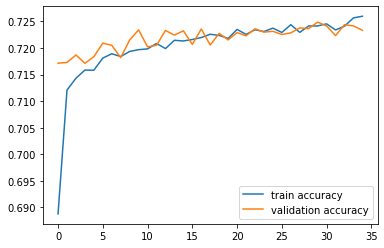

max score test = 0.7248465 at epoch= 29; n_neurons = 606


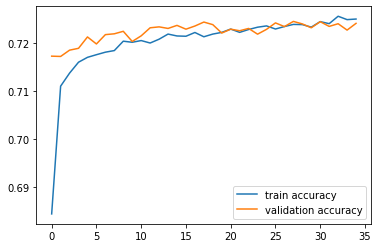

max score test = 0.7244244 at epoch= 27; n_neurons = 546


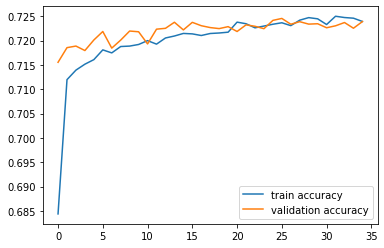

max score test = 0.7245587 at epoch= 25; n_neurons = 524


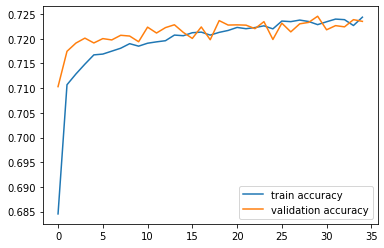

max score test = 0.7245587 at epoch= 29; n_neurons = 464


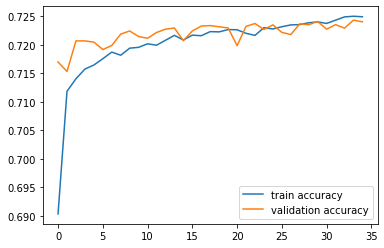

max score test = 0.72434765 at epoch= 33; n_neurons = 518


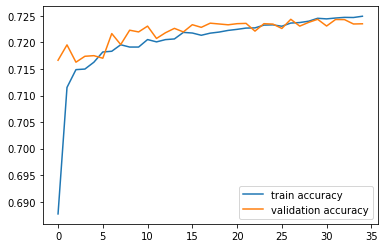

max score test = 0.72436684 at epoch= 26; n_neurons = 569


(0.7248464822769165, 606)

In [8]:
res_MLP = gp_minimize(objectiveMLP, spaceMLP, n_calls=10, random_state=0)
1-res_MLP.fun, res_MLP.x[0]

# MLP with more small layers 

In [9]:
spaceMLP  = [Integer(2, 20, name="n_neurons"),
             Integer(5, 25, name="n_layers")]

In [10]:
@use_named_args(spaceMLP)
def objectiveMLP(n_neurons, n_layers):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for i in range(n_layers):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test), verbose=0)
    e = max(history.history['val_accuracy'])
    epoch = history.history['val_accuracy'].index(e)
    plt.plot(range(100),history.history['accuracy'], label="train accuracy")
    plt.plot(range(100),history.history['val_accuracy'], label="validation accuracy")
    plt.legend()
    plt.show()
    print("max score test = "+ str(e) + " at epoch= " + str(epoch) + "; n_neurons = " + str(n_neurons) + "; n_layers = " + str(n_layers))
    return 1 - e

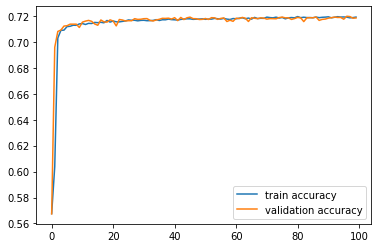

max score test = 0.7197237 at epoch= 96; n_neurons = 13; n_layers = 22


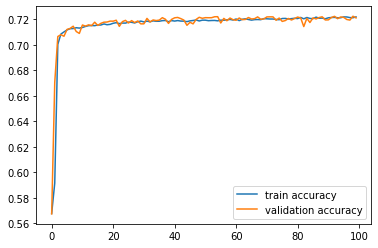

max score test = 0.72250575 at epoch= 98; n_neurons = 17; n_layers = 22


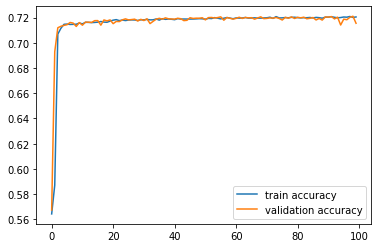

max score test = 0.7210284 at epoch= 98; n_neurons = 13; n_layers = 13


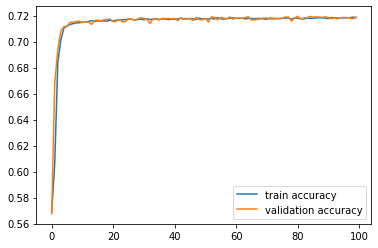

max score test = 0.71949345 at epoch= 80; n_neurons = 7; n_layers = 6


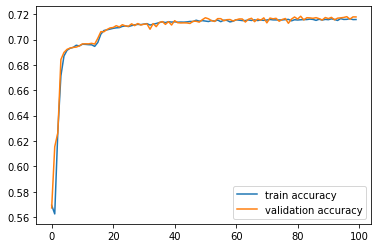

max score test = 0.7183807 at epoch= 81; n_neurons = 7; n_layers = 15


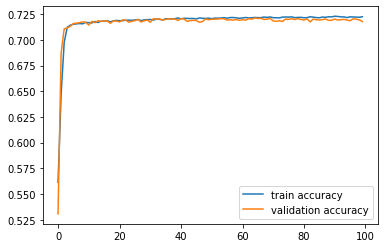

max score test = 0.72133535 at epoch= 64; n_neurons = 17; n_layers = 15


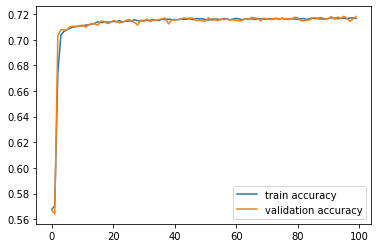

max score test = 0.7182847 at epoch= 95; n_neurons = 9; n_layers = 22


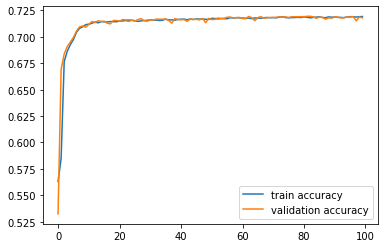

max score test = 0.71951264 at epoch= 82; n_neurons = 8; n_layers = 18


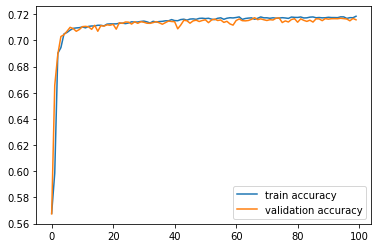

max score test = 0.71738297 at epoch= 66; n_neurons = 9; n_layers = 24


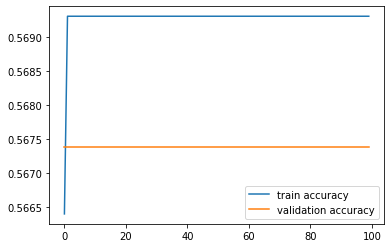

max score test = 0.567383 at epoch= 0; n_neurons = 5; n_layers = 22


(0.7225057482719421, 17, 22)

In [11]:
res_MLP = gp_minimize(objectiveMLP, spaceMLP, n_calls=10, random_state=0)
1-res_MLP.fun, res_MLP.x[0], res_MLP.x[1]

# Generalization & Predictions

I will make predictions with the 2x600 neurons network and with the 13x13 neurons network, hoping that their specificity will be different.

In [12]:
generalization = pd.Series(index=range(4))
for i in generalization.index:
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(2):
        model.add(keras.layers.Dense(660,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step1_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    y_test= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_test.index]["damage_grade"]-1
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=30, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP1']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP1_predicted_step1_subset_{}.csv".format(i))
    generalization[i] = f1_score(y_test, predict, average='micro')
generalization

0    0.718054
1    0.716097
2    0.716999
3    0.718323
dtype: float64

In [13]:
for i in range(5):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(2):
        model.add(keras.layers.Dense(660,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step2_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=30, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP1']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP1_predicted_step2_subset_{}.csv".format(i))

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=47))
for k in range(2):
    model.add(keras.layers.Dense(660,activation="relu"))
model.add(keras.layers.Dense(3, activation='softmax'))
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
X_train = pd.read_csv('Datasets/train_full_processed.csv', index_col=0)
y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
X_val = pd.read_csv('Datasets/submission_processed.csv', index_col=0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val2 = np.asarray(X_val)
model.fit(X_train, y_train, epochs=30, batch_size=1024, verbose=0)
predict = pd.DataFrame(model.predict_classes(X_val2), columns=['MLP1']).set_index(X_val.index)
predict.to_csv("Datasets/MLP1_predicted_submission.csv")

In [15]:
generalization = pd.Series(index=range(4))
for i in generalization.index:
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(13):
        model.add(keras.layers.Dense(13,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step1_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    y_test= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_test.index]["damage_grade"]-1
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP2']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP2_predicted_step1_subset_{}.csv".format(i))
    generalization[i] = f1_score(y_test, predict, average='micro')
generalization

0    0.718342
1    0.716692
2    0.718937
3    0.719762
dtype: float64

In [16]:
for i in range(5):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(13):
        model.add(keras.layers.Dense(13,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step2_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP2']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP2_predicted_step2_subset_{}.csv".format(i))

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=47))
for k in range(13):
    model.add(keras.layers.Dense(13,activation="relu"))
model.add(keras.layers.Dense(3, activation='softmax'))
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
X_train = pd.read_csv('Datasets/train_full_processed.csv', index_col=0)
y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
X_val = pd.read_csv('Datasets/submission_processed.csv', index_col=0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val2 = np.asarray(X_val)
model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=0)
predict = pd.DataFrame(model.predict_classes(X_val2), columns=['MLP2']).set_index(X_val.index)
predict.to_csv("Datasets/MLP2_predicted_submission.csv")